In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import os
import numpy as np
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap

In [7]:
#Sua pasta com os arquivos netcdf (o 'r' é para o caso de haver '\' ao inves de '/' no caminho do arquivo)

diretorio1 = r"E:\WRF_dados\WRF1" # diretório para os modelos do WRF 1

diretorio2 = r"E:\WRF_dados\WRF2" # diretório para os modelos do WRF 2

diretorio3 = r"E:\WRF_dados\WRF3" # diretório para os modelos do WRF 3

In [4]:
# Pegando a localização de Angra dos Reis
# teste = xr.open_dataset(r"D:\WRF_dados\WRF1\1_2016-01-15_8_16.nc")
# Variavel com as coordenadas
# localizacao = teste.lon.values.min(), teste.lon.values.max(), teste.lat.values.min(), teste.lat.values.max()

# print(teste['time'])

In [4]:
#f7fbff (Branco Azulado Claro)
#deebf7 (Azul Muito Claro)
#c6dbef (Azul Claro)
#9ecae1 (Azul Moderado Claro)
#6baed6 (Azul Moderado)
#4292c6 (Azul Intenso)
#2171b5 (Azul Forte)
#084594 (Azul Muito Escuro)

# Plotando todos os Mapas do Grade 1

C:\Users\Pedro\AppData\Local\Temp\ipykernel_9728\2433866687.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 0.9, 0.95])


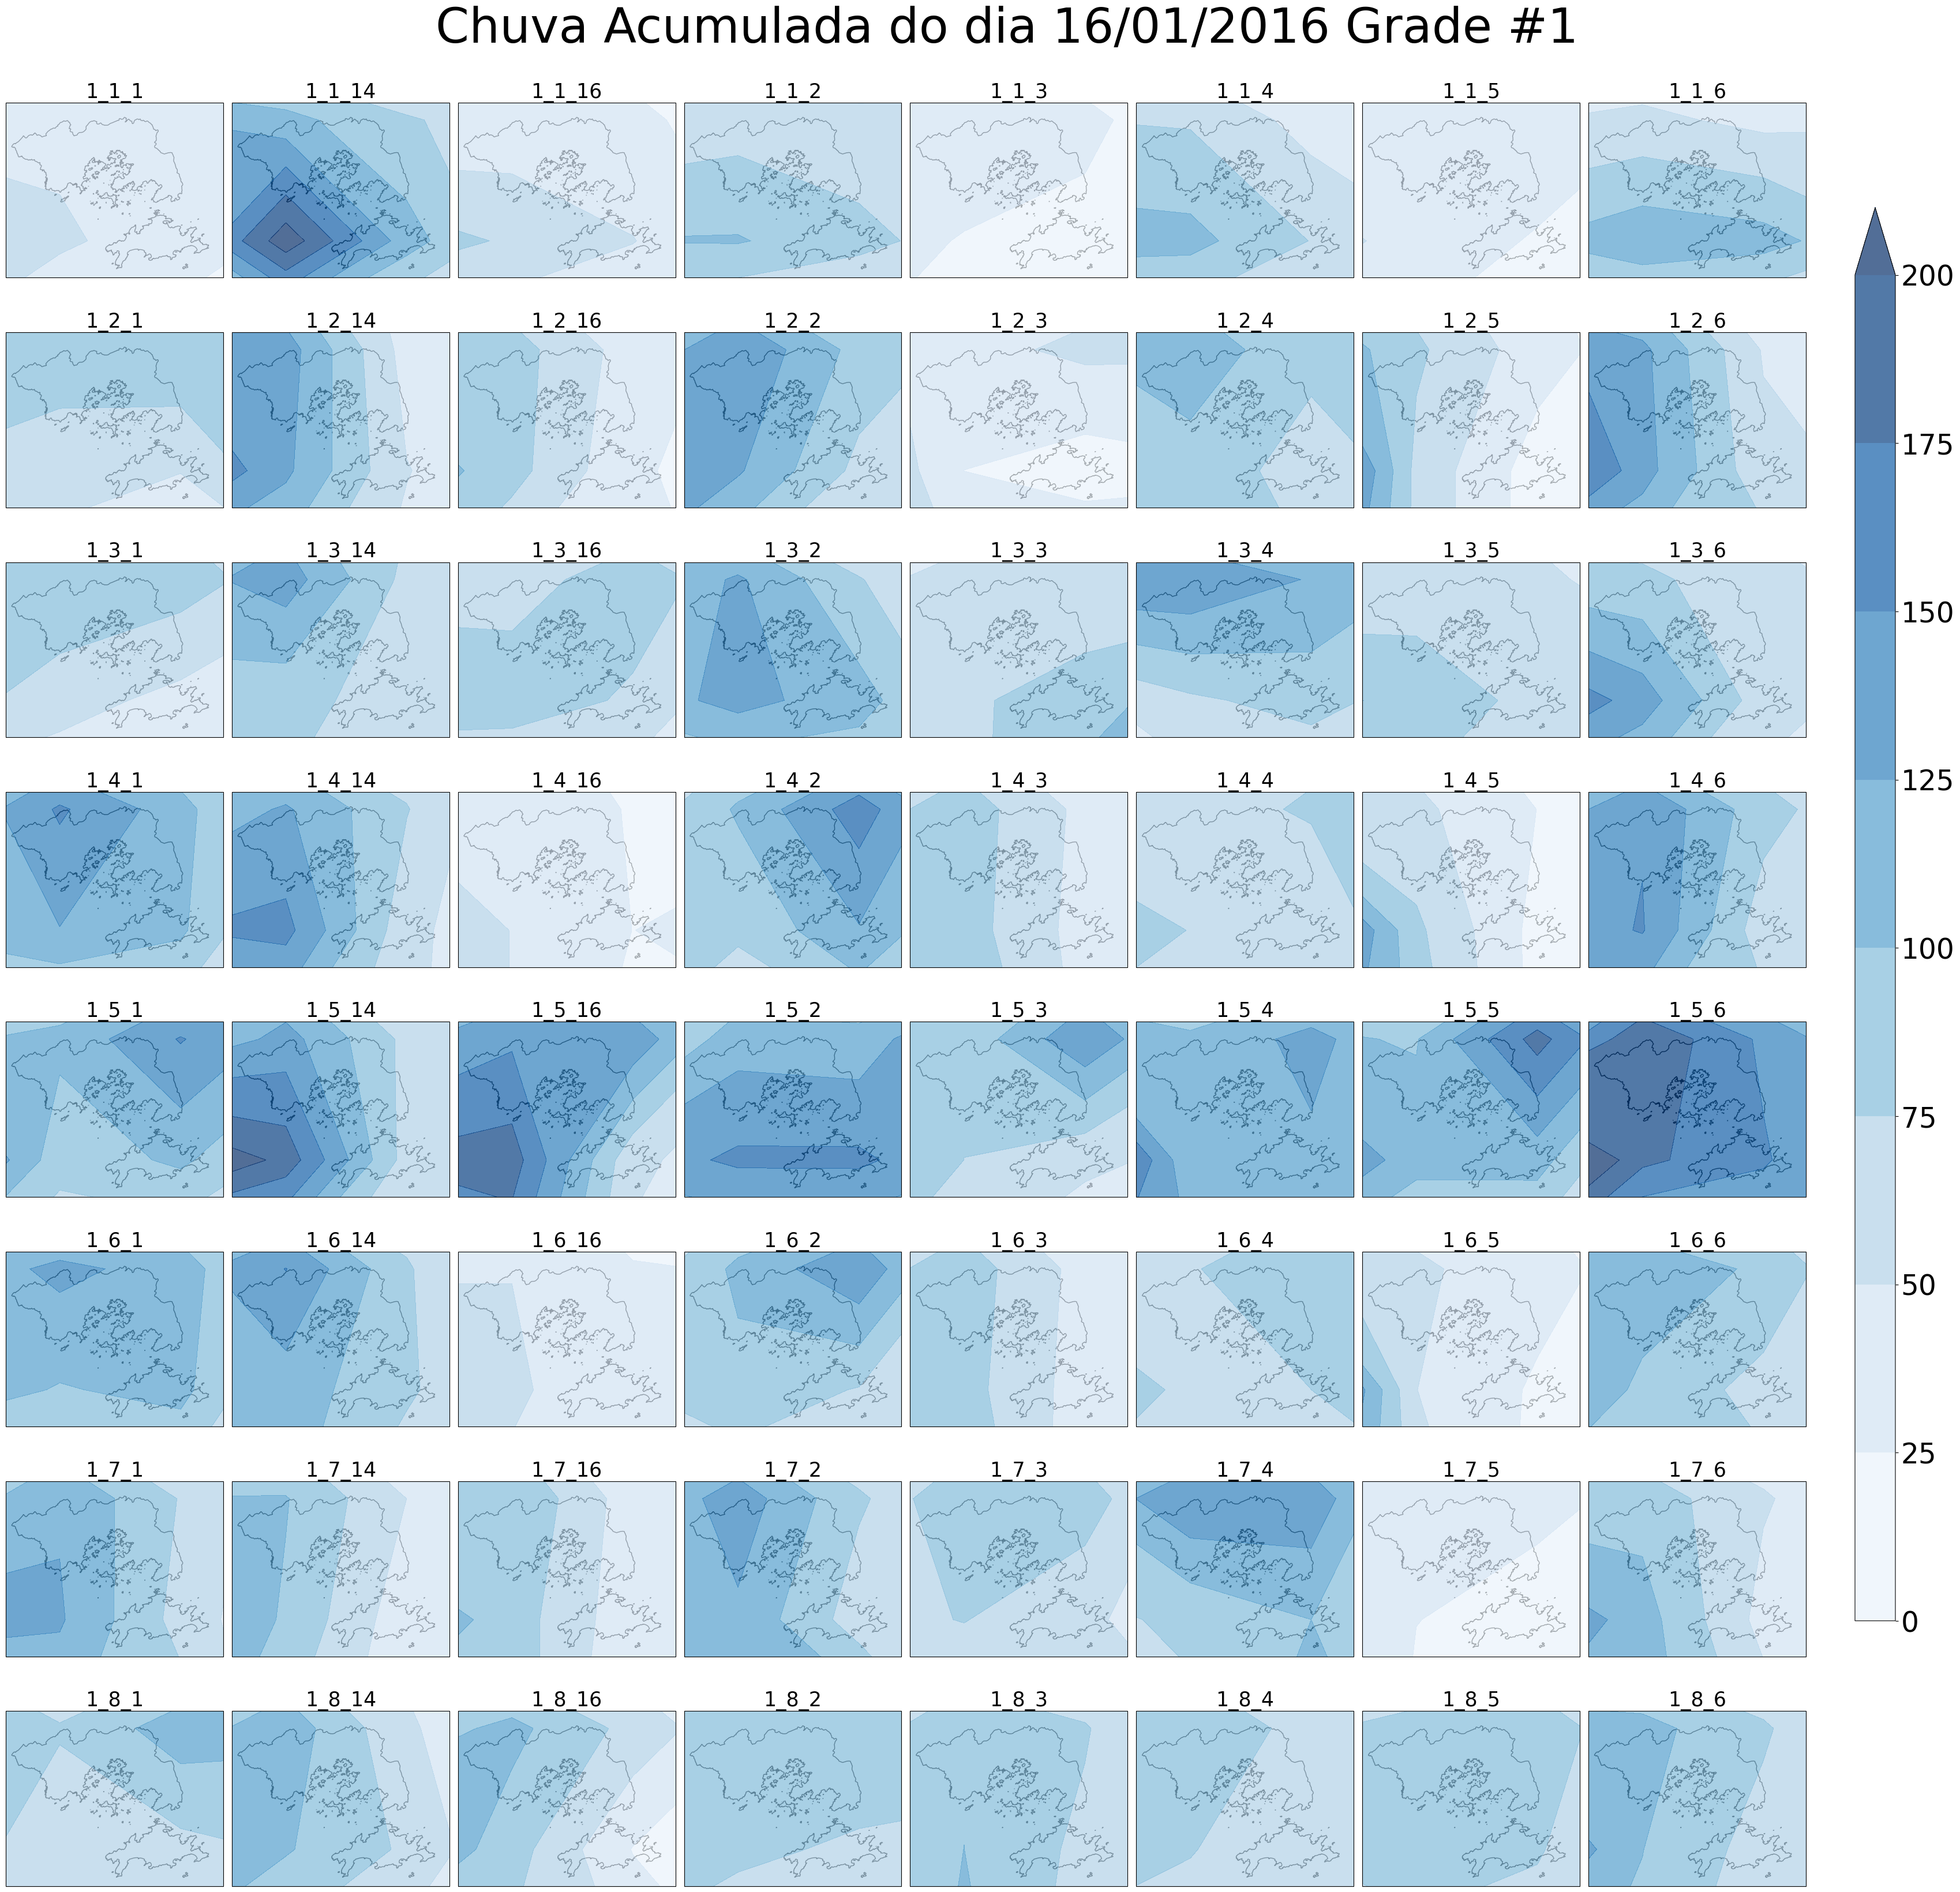

In [ ]:
arquivos = [os.path.join(diretorio1, nome) for nome in os.listdir(diretorio1) if nome.endswith('.nc')]

#Mapa com valores acumulados para esta data de evento extremo em Angra
fig, axes = plt.subplots(figsize = (35,35), nrows = 8, ncols = 8, subplot_kw = {'projection': ccrs.PlateCarree()}) #figura com 1 mapa de tamanho 10x10

colors = ["#f7fbff", '#deebf7', '#c6dbef','#9ecae1','#6baed6','#4292c6', '#2171b5','#084594','#0a31bf']  # Azul escuro até branco roxo: '#8C24BD', azul escuro: '#01337F'

for arquivo, ax in zip(arquivos, axes.flat):

    # pegando o nome da simulação
    nome_simulacao = os.path.basename(arquivo).removesuffix('.nc')
    nome_simulacao = nome_simulacao.replace(nome_simulacao[2:13], '')
    
    # abrindo o arquivo como dataset
    netcdf = xr.open_dataset(arquivo)

    # criando um loop para plotar todos os arquivos
    chuva = netcdf['chuva'] #chuva acumulada

    # Queremos os acumulados entre o período que o Fabricio pediu no whats
    # de 12 UTC do dia 27 até 11:59 do dia 28 (Não tem 11:59, só 12 msm)

    #Então temos que tirar o acumulo primeiro...
    chuva_pontual = chuva.diff(dim = 'time')
    #Selecionando os dados do periodo das 12 UTC de um dia até 12 UTC do outro dia
    chuva_acumulada_evento = chuva_pontual.isel(lev = 18).sel(time = slice('2016-01-15T12:00:00.000000000', '2016-01-16T12:00:00.000000000'))
    #calcula a soma acumulada deste intervalo de tempo
    chuva_acumulada_evento = chuva_acumulada_evento.cumsum(dim = 'time')
    
    #Linhas de costa
    # ax.coastlines()

    # Colocando o recorte da região da figura (coloque as lon e lat minima e máxima de uma simulação da grade 3 pra ficar no recorte de Angra)
    ax.set_extent([-44.657, -44.05, -23.25, -22.8], crs=ccrs.PlateCarree()) #Transforme esse comentario em codigo

    # Shape de Angra
    shape_falha = r'C:\IC\Mapa\Estados_utm23s.shp' #shape de Angra 
    angra = gpd.read_file(shape_falha) #Transforme esse comentario em codigo
    angra.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)

    #Encontrando o valor final acumulado da chuva
    chuva_acumulada_evento.time.shape #25 (de 0 à 24

    # pegando o valor acumulado de chuva no último instante de tempo
    chuva_total = chuva_acumulada_evento.isel(time = 24)

    #Criando a grade de latitudes e longitudes
    lon, lat = np.meshgrid(chuva_acumulada_evento.lon.values, chuva_acumulada_evento.lat.values)

    # Definir os limites da escala de cores de até 200 - 0 a 25, 25 a 50, 50 a 75, 75 a 100, 125 a 150, 1750 a 175, 175 a 200
    levels = [0, 25, 50, 75, 100, 125, 150, 175, 200]  # 8 níveis para cobrir até 200

    # definindo o mapa de contorno
    mapa_de_contorno = ax.contourf(lon, lat, chuva_total, cmap = 'Blues', alpha=0.7, levels=levels, extend ='max')
    
    # adicionando o título da simulação
    ax.set_title(nome_simulacao, fontsize=25)

# Criando uma barra única para o mapa de contorno
# fig.subplots_adjust(right=0.8) #ajusta a posição da barra de cor
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])

# 
cbar = fig.colorbar(mapa_de_contorno, cax=cbar_ax, extend ='max', ticks = levels)
cbar.ax.tick_params(labelsize = 35) 

fig.suptitle('Chuva Acumulada do dia 16/01/2016 Grade #1', fontsize=60, y=0.95)
fig.tight_layout(rect=[0, 0, 0.9, 0.95])

# cbar = plt.colorbar(mapa_de_contorno, ax=ax, orientation='horizontal', pad=0.05)
# cbar.set_label('Valores do Contour')

plt.savefig(os.path.join(diretorio1, 'chuva_acumulada_'+os.path.basename(arquivo).replace('.nc', '.png')))

In [13]:
os.path.basename(arquivo).removesuffix('.nc')

# "E:\WRF_dados\tratados\WRF-2016-01-16\1_2016-01-15_1_1.nc"

'1_2016-01-15_8_6'

In [14]:
os.path.basename(arquivo).replace(arquivo[2:12], '')

'1_2016-01-15_8_6.nc'

# Plotando todos os Mapas do Grade 2

C:\Users\Pedro\AppData\Local\Temp\ipykernel_9728\1215109285.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 0.9, 0.95])


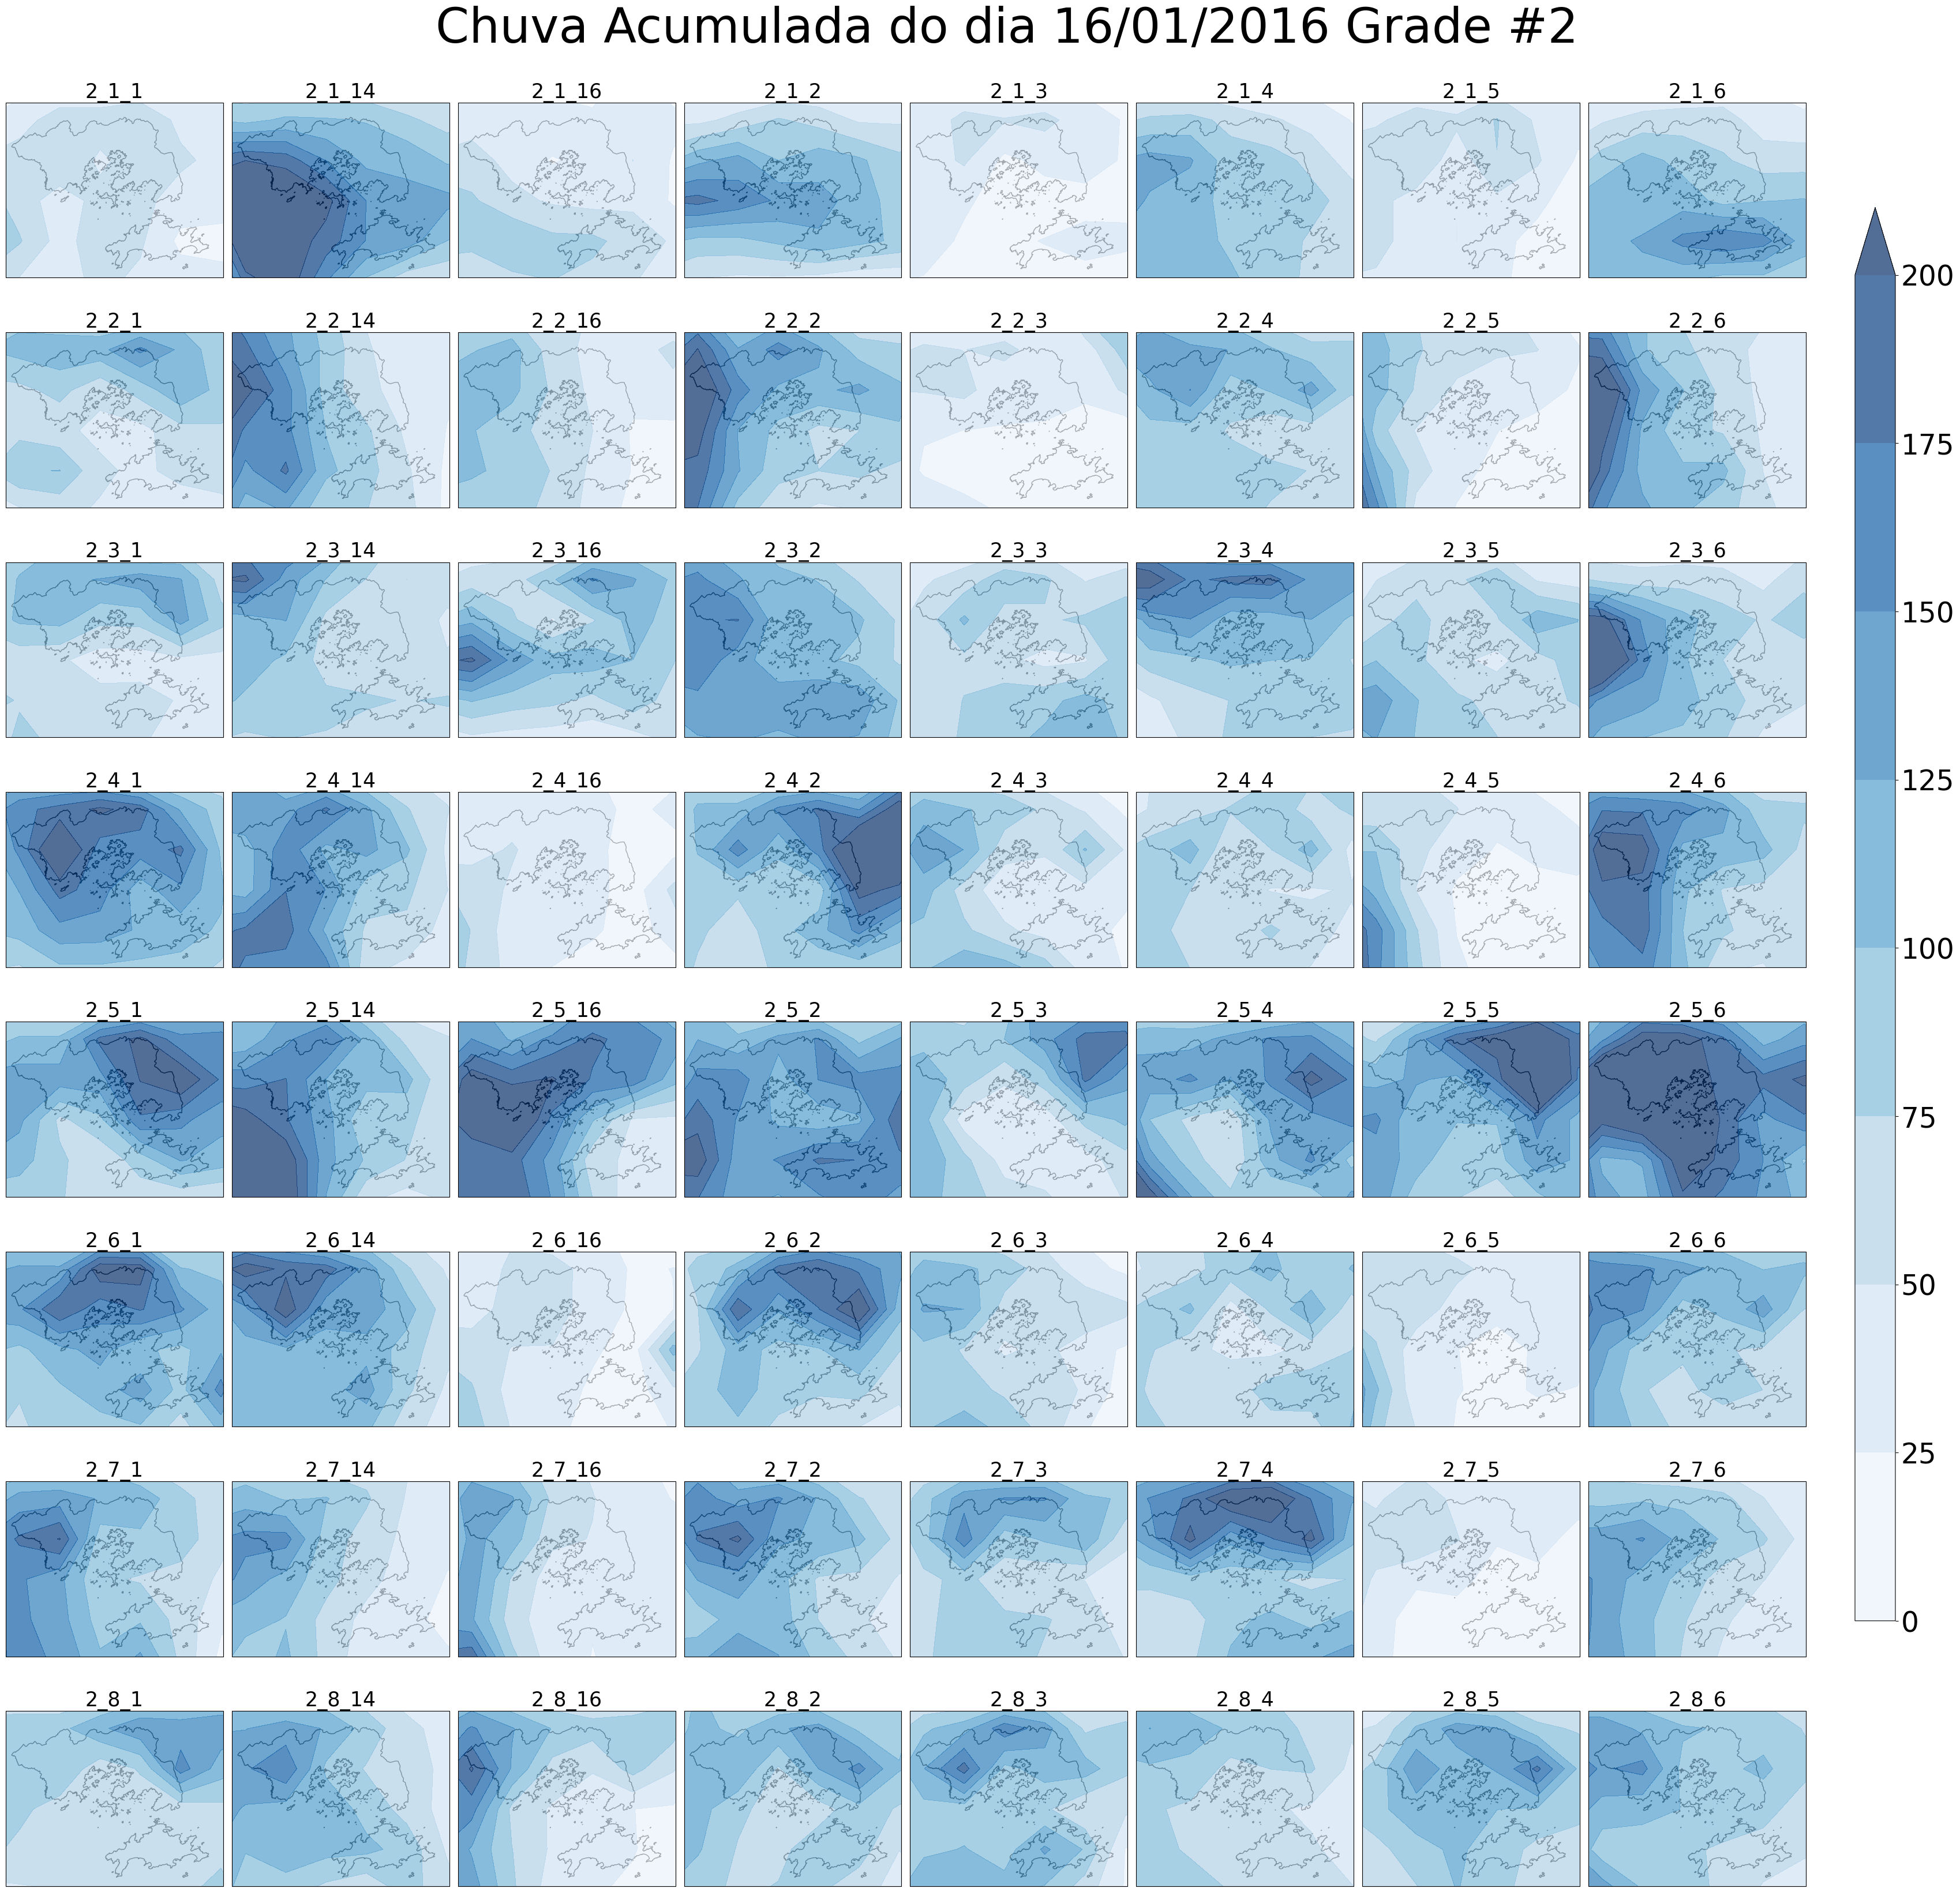

In [16]:
arquivos = [os.path.join(diretorio2, nome) for nome in os.listdir(diretorio2) if nome.endswith('.nc')]

#Mapa com valores acumulados para esta data de evento extremo em Angra
fig, axes = plt.subplots(figsize = (35,35), nrows = 8, ncols = 8, subplot_kw = {'projection': ccrs.PlateCarree()}) #figura com 1 mapa de tamanho 10x10

colors = ["#f7fbff", '#deebf7', '#c6dbef','#9ecae1','#6baed6','#4292c6', '#2171b5','#084594','#0a31bf']  # Azul escuro até branco roxo: '#8C24BD', azul escuro: '#01337F'

for arquivo, ax in zip(arquivos, axes.flat):

    # pegando o nome da simulação
    nome_simulacao = os.path.basename(arquivo).removesuffix('.nc')
    nome_simulacao = nome_simulacao.replace(nome_simulacao[2:13], '')
    
    # abrindo o arquivo como dataset
    netcdf = xr.open_dataset(arquivo)

    # criando um loop para plotar todos os arquivos
    chuva = netcdf['chuva'] #chuva acumulada

    # Queremos os acumulados entre o período que o Fabricio pediu no whats
    # de 12 UTC do dia 27 até 11:59 do dia 28 (Não tem 11:59, só 12 msm)

    #Então temos que tirar o acumulo primeiro...
    chuva_pontual = chuva.diff(dim = 'time')
    #Selecionando os dados do periodo das 12 UTC de um dia até 12 UTC do outro dia
    chuva_acumulada_evento = chuva_pontual.isel(lev = 18).sel(time = slice('2016-01-15T12:00:00.000000000', '2016-01-16T12:00:00.000000000'))
    #calcula a soma acumulada deste intervalo de tempo
    chuva_acumulada_evento = chuva_acumulada_evento.cumsum(dim = 'time')
    
    #Linhas de costa
    # ax.coastlines()

    # Colocando o recorte da região da figura (coloque as lon e lat minima e máxima de uma simulação da grade 3 pra ficar no recorte de Angra)
    ax.set_extent([-44.657, -44.05, -23.25, -22.8], crs=ccrs.PlateCarree()) #Transforme esse comentario em codigo

    # Shape de Angra
    shape_falha = r'C:\IC\Mapa\Estados_utm23s.shp' #shape de Angra 
    angra = gpd.read_file(shape_falha) #Transforme esse comentario em codigo
    angra.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)

    #Encontrando o valor final acumulado da chuva
    chuva_acumulada_evento.time.shape #25 (de 0 à 24

    # pegando o valor acumulado de chuva no último instante de tempo
    chuva_total = chuva_acumulada_evento.isel(time = 24)

    #Criando a grade de latitudes e longitudes
    lon, lat = np.meshgrid(chuva_acumulada_evento.lon.values, chuva_acumulada_evento.lat.values)

    # Definir os limites da escala de cores de até 200 - 0 a 25, 25 a 50, 50 a 75, 75 a 100, 125 a 150, 1750 a 175, 175 a 200
    levels = [0, 25, 50, 75, 100, 125, 150, 175, 200]  # 8 níveis para cobrir até 200

    # definindo o mapa de contorno
    mapa_de_contorno = ax.contourf(lon, lat, chuva_total, cmap = 'Blues', alpha=0.7, levels=levels, extend ='max')
    
    # adicionando o título da simulação
    ax.set_title(nome_simulacao, fontsize=25)

# Criando uma barra única para o mapa de contorno
# fig.subplots_adjust(right=0.8) #ajusta a posição da barra de cor
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])

# 
cbar = fig.colorbar(mapa_de_contorno, cax=cbar_ax, extend ='max', ticks = levels)
cbar.ax.tick_params(labelsize = 35) 

fig.suptitle('Chuva Acumulada do dia 16/01/2016 Grade #2', fontsize=60, y=0.95)
fig.tight_layout(rect=[0, 0, 0.9, 0.95])

# cbar = plt.colorbar(mapa_de_contorno, ax=ax, orientation='horizontal', pad=0.05)
# cbar.set_label('Valores do Contour')

plt.savefig(os.path.join(diretorio2, 'chuva_acumulada_'+os.path.basename(arquivo).replace('.nc', '.png')))

# Plotando todos os Mapas do Grade 3

C:\Users\Pedro\AppData\Local\Temp\ipykernel_9728\298806674.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 0.9, 0.95])


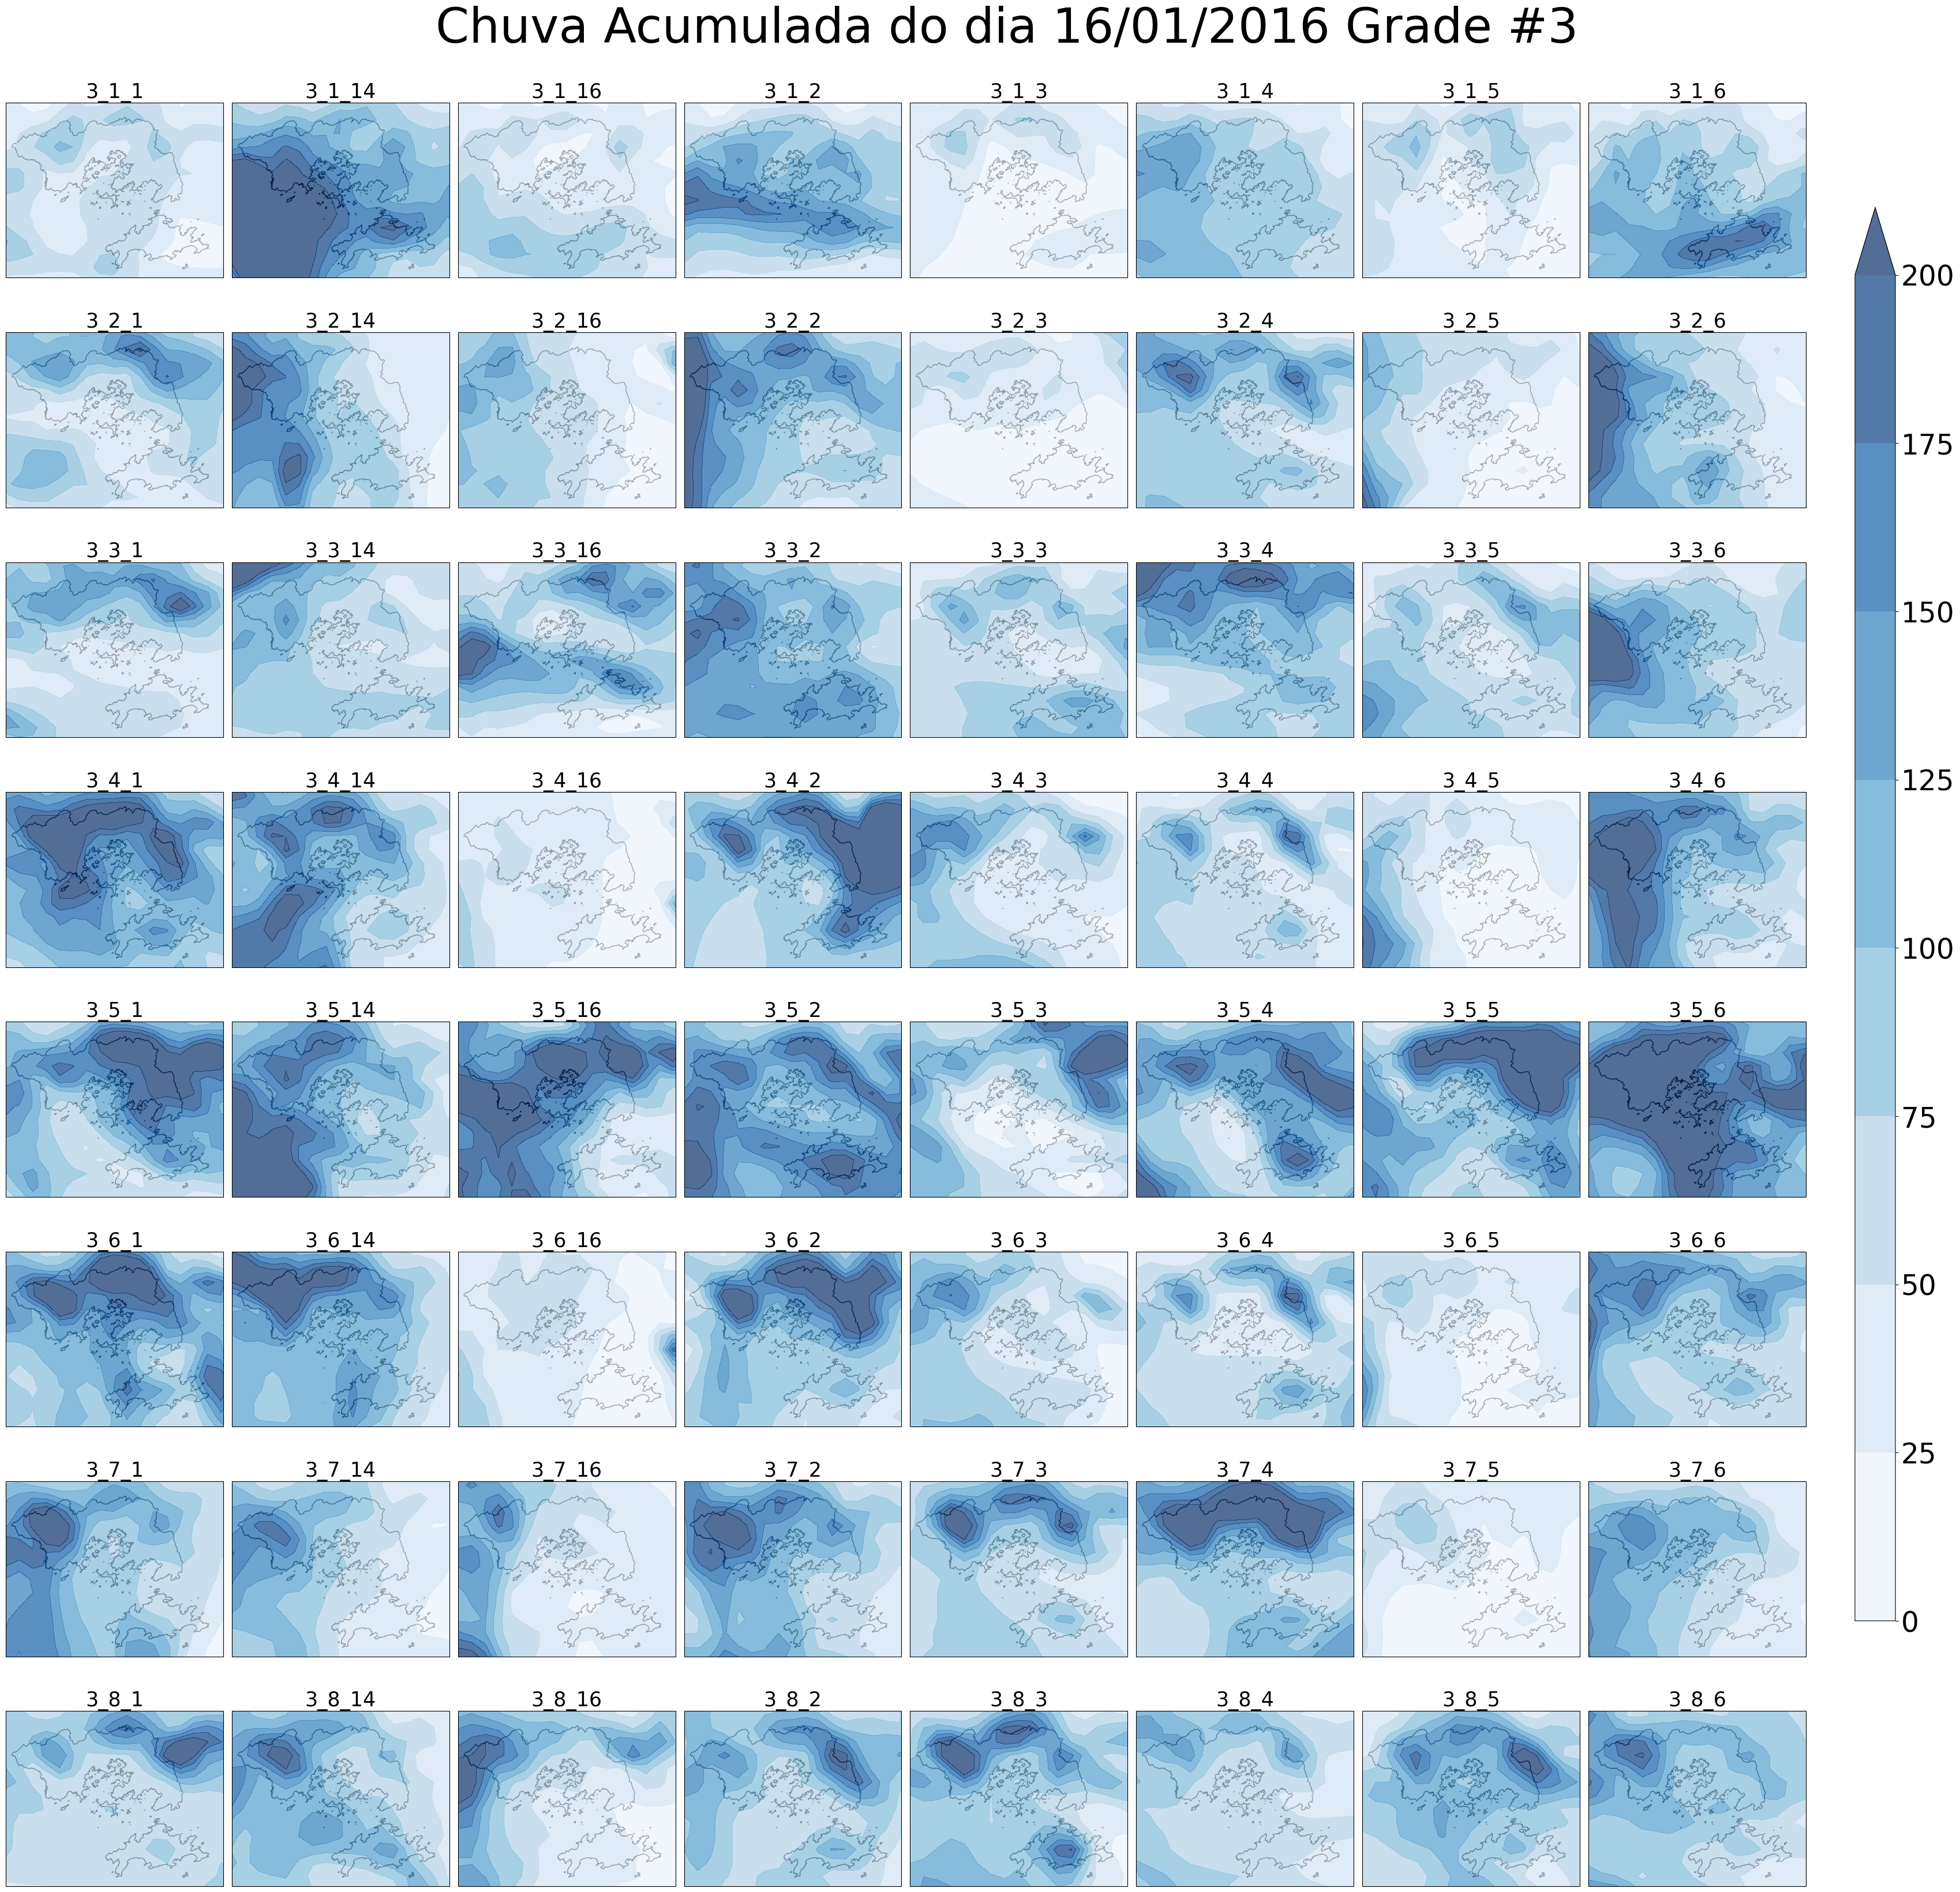

In [17]:
arquivos = [os.path.join(diretorio3, nome) for nome in os.listdir(diretorio3) if nome.endswith('.nc')]

#Mapa com valores acumulados para esta data de evento extremo em Angra
fig, axes = plt.subplots(figsize = (35,35), nrows = 8, ncols = 8, subplot_kw = {'projection': ccrs.PlateCarree()}) #figura com 1 mapa de tamanho 10x10

colors = ["#f7fbff", '#deebf7', '#c6dbef','#9ecae1','#6baed6','#4292c6', '#2171b5','#084594','#0a31bf']  # Azul escuro até branco roxo: '#8C24BD', azul escuro: '#01337F'

for arquivo, ax in zip(arquivos, axes.flat):

    # pegando o nome da simulação
    nome_simulacao = os.path.basename(arquivo).removesuffix('.nc')
    nome_simulacao = nome_simulacao.replace(nome_simulacao[2:13], '')

    # abrindo o arquivo como dataset
    netcdf = xr.open_dataset(arquivo)

    # criando um loop para plotar todos os arquivos
    chuva = netcdf['chuva'] #chuva acumulada

    # Queremos os acumulados entre o período que o Fabricio pediu no whats
    # de 12 UTC do dia 27 até 11:59 do dia 28 (Não tem 11:59, só 12 msm)

    #Então temos que tirar o acumulo primeiro...
    chuva_pontual = chuva.diff(dim = 'time')
    #Selecionando os dados do periodo das 12 UTC de um dia até 12 UTC do outro dia
    chuva_acumulada_evento = chuva_pontual.isel(lev = 18).sel(time = slice('2016-01-15T12:00:00.000000000', '2016-01-16T12:00:00.000000000'))
    #calcula a soma acumulada deste intervalo de tempo
    chuva_acumulada_evento = chuva_acumulada_evento.cumsum(dim = 'time')
    
    #Linhas de costa
    # ax.coastlines()

    # Colocando o recorte da região da figura (coloque as lon e lat minima e máxima de uma simulação da grade 3 pra ficar no recorte de Angra)
    ax.set_extent([-44.657, -44.05, -23.25, -22.8], crs=ccrs.PlateCarree()) #Transforme esse comentario em codigo

    # Shape de Angra
    shape_falha = r'C:\IC\Mapa\Estados_utm23s.shp' #shape de Angra 
    angra = gpd.read_file(shape_falha) #Transforme esse comentario em codigo
    angra.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)

    #Encontrando o valor final acumulado da chuva
    chuva_acumulada_evento.time.shape #25 (de 0 à 24

    # pegando o valor acumulado de chuva no último instante de tempo
    chuva_total = chuva_acumulada_evento.isel(time = 24)

    #Criando a grade de latitudes e longitudes
    lon, lat = np.meshgrid(chuva_acumulada_evento.lon.values, chuva_acumulada_evento.lat.values)

    # Definir os limites da escala de cores de até 200 - 0 a 25, 25 a 50, 50 a 75, 75 a 100, 125 a 150, 1750 a 175, 175 a 200
    levels = [0, 25, 50, 75, 100, 125, 150, 175, 200]  # 8 níveis para cobrir até 200

    # definindo o mapa de contorno
    mapa_de_contorno = ax.contourf(lon, lat, chuva_total, cmap = 'Blues', alpha=0.7, levels=levels, extend ='max')
    
    # adicionando o título da simulação
    ax.set_title(nome_simulacao, fontsize=25)

# Criando uma barra única para o mapa de contorno
# fig.subplots_adjust(right=0.8) #ajusta a posição da barra de cor
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])

# 
cbar = fig.colorbar(mapa_de_contorno, cax=cbar_ax, extend ='max', ticks = levels)
cbar.ax.tick_params(labelsize = 35) 

fig.suptitle('Chuva Acumulada do dia 16/01/2016 Grade #3', fontsize=60, y=0.95)
fig.tight_layout(rect=[0, 0, 0.9, 0.95])

# cbar = plt.colorbar(mapa_de_contorno, ax=ax, orientation='horizontal', pad=0.05)
# cbar.set_label('Valores do Contour')

plt.savefig(os.path.join(diretorio3, 'chuva_acumulada_'+os.path.basename(arquivo).replace('.nc', '.png')))

In [9]:
os.path.basename(arquivo).removesuffix('.nc')

'1_2016-01-15_8_6'